In [1]:
!pip install scikit-learn==1.3.2
import sklearn
print(sklearn.__version__)


1.3.2


In [2]:
# modules

import numpy as np
import pandas as pd
import re
import nltk
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm
tqdm.pandas()


In [3]:
stress_data = pd.read_csv(r'/stress.csv')
stress_data.shape

(2838, 116)

In [4]:
stress_data.head(10)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6,2.851935,-0.117262


In [5]:
stress_data.isnull().sum()

,0
subreddit,0
post_id,0
sentence_range,0
text,0
id,0
...,...
lex_dal_avg_pleasantness,0
social_upvote_ratio,0
social_num_comments,0
syntax_fk_grade,0


0 -> No Stress

1 -> Stressed

In [6]:
stress_data['label'].value_counts()

,count
label,
1,1488
0,1350


<ipython-input-7-354b089095e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stress_data, x='label', palette=['green', 'red'])


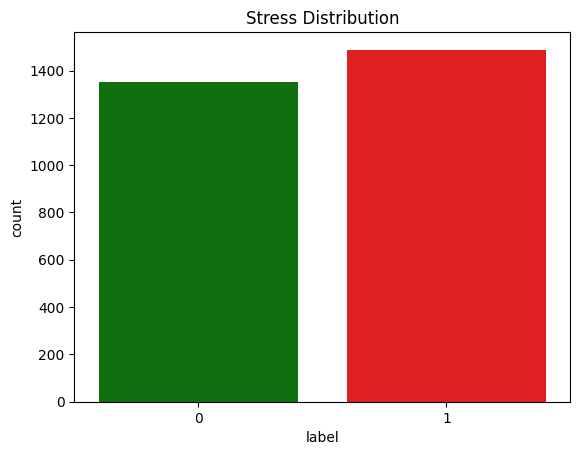

In [7]:
plt.Figure(figsize=(3,2))
sns.countplot(data=stress_data, x='label', palette=['green', 'red'])
plt.title('Stress Distribution')
plt.ylabel('count')
plt.show()

In [8]:
# analyzing random text
random_text = [random.randint(0, stress_data.shape[0]-1) for i in range(5)]
for i in stress_data['text'].loc[random_text]:
  print(i,"\n")

I instantly thought of something I rarely think about, being molested in a pool locker room when I was 10. My heart started beating incredibly fast as I readied myself to tell them the thing I couldn’t even tell my family at the time. I started crying, something I haven’t done in years and something my friends have never seen me do. When it got to me, with my hand over my eyes all I could say was “I don’t think I can”. It felt like I was reliving what I’d gone through, like I could see it happening in front of me. 

I am so scared to go up to 10mg because I want to still be able to lose weight. My doc has suggested Prozac because it has had more success with weight loss than weight gain with majority of people. I just don't know what I want to do. I thought I was going to be able to get off meds but these physical symptoms which set off my hypocondria are coming back in full swing. Even though I KNOW it's anxiety, I can't break the loop of thoughts. 

But it seems like I'm also dealing

In [9]:
# downloading NLTK resources

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# lemmatizer and stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# function for cleaning text

def clean_text(text):
   # removing URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)

  # removing mentions
  text = re.sub(r'@\w+|[^a-zA-Z\s]', '', text)

  # Convert to lowercase
  text = text.lower()

  # Tokenization
  tokens = word_tokenize(text)

   # removing stopwords and lemmatize
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)

In [11]:
# using clean_text function in text column of dataset
stress_data['cleaned_text'] = stress_data['text'].progress_apply(clean_text)

100%|██████████| 2838/2838 [00:12<00:00, 228.15it/s]


In [12]:
stress_data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,cleaned_text
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,said felt way suggeted go rest trigger ahead y...
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,hey rassistance sure right place post go im cu...
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894,mom hit newspaper shocked would know dont like...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671,met new boyfriend amazing kind sweet good stud...
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,october domestic violence awareness month dome...


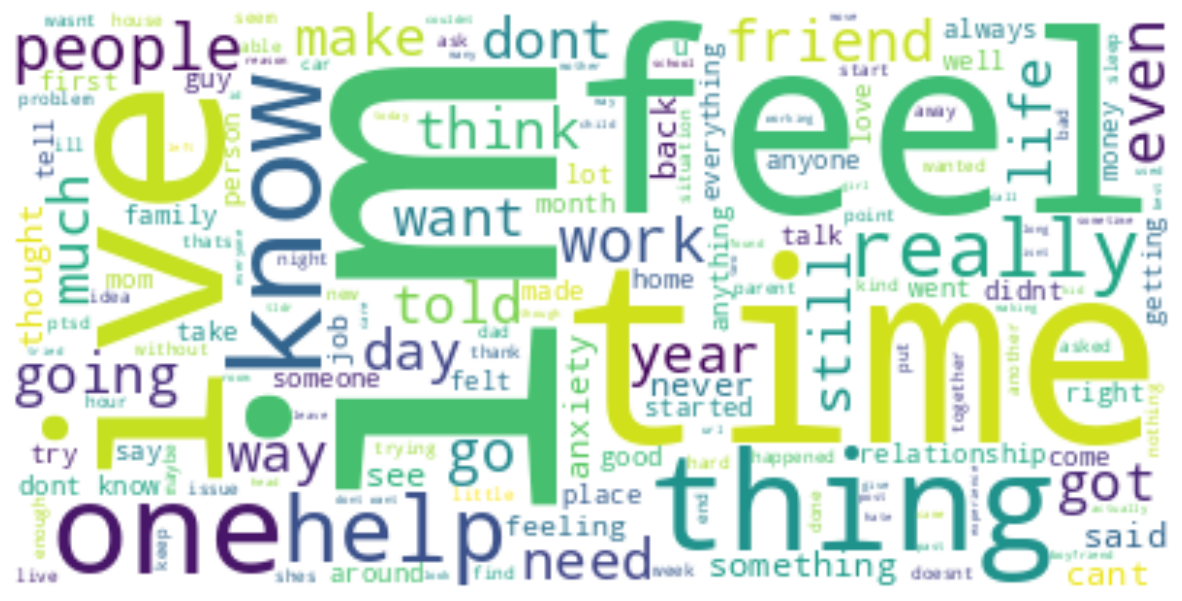

In [13]:
from wordcloud import WordCloud, STOPWORDS

# Combine all cleaned text into a single string
text = " ".join(i for i in stress_data['cleaned_text'])
stopwords = set(STOPWORDS)

# Generate the WordCloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)

# Plot the WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
stress_data = stress_data[['cleaned_text', 'label']]
stress_data

,cleaned_text,label
0,said felt way suggeted go rest trigger ahead y...,1
1,hey rassistance sure right place post go im cu...,0
2,mom hit newspaper shocked would know dont like...,1
3,met new boyfriend amazing kind sweet good stud...,1
4,october domestic violence awareness month dome...,1
...,...,...
2833,week ago precious ignored jan happy year preci...,0
2834,dont ability cope anymore im trying lot thing ...,1
2835,case first time youre reading post looking peo...,0
2836,find normal good relationship main problem see...,0


In [15]:
X = stress_data['cleaned_text'].values
y = stress_data['label'].values

In [16]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [17]:
# converting textual data into numerical data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Model: Logistic Regression
Training Accuracy: 0.9139
Testing Accuracy: 0.7606
Recall: 0.7606
Precision: 0.7611
F1 Score: 0.7601
----------------------------------------


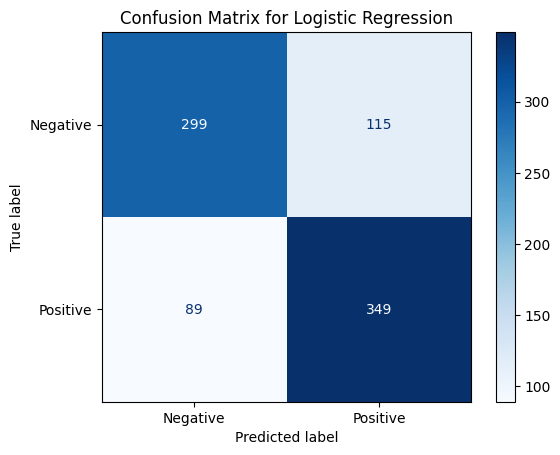

Model: Naive Bayes
Training Accuracy: 0.8525
Testing Accuracy: 0.6678
Recall: 0.6678
Precision: 0.7467
F1 Score: 0.6343
----------------------------------------


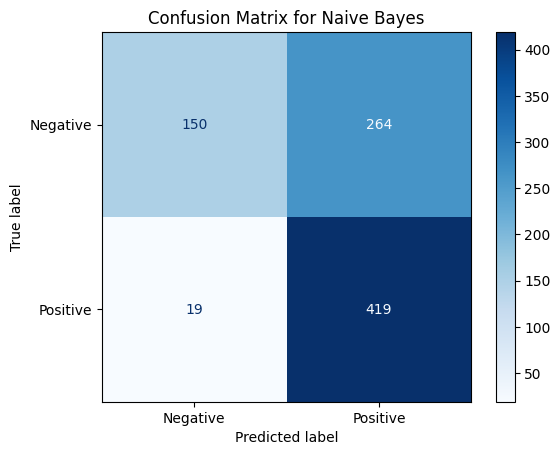

Best Model: Logistic Regression with Testing Accuracy: 0.7606


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB()
}

model_performance = {}
best_model_name = None
best_model_score = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    model_performance[model_name] = {
        "Training Accuracy": training_accuracy,
        "Testing Accuracy": testing_accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }

    print(f"Model: {model_name}")
    print(f"Training Accuracy: {training_accuracy:.4f}")
    print(f"Testing Accuracy: {testing_accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("--" * 20)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    # Check if this model is the best so far
    if testing_accuracy > best_model_score:
        best_model_score = testing_accuracy
        best_model_name = model_name
        best_model = model

print(f"Best Model: {best_model_name} with Testing Accuracy: {best_model_score:.4f}")


In [19]:
# saving the model
import pickle

# Save the best model using pickle
if best_model_name:
    with open(f"{best_model_name.replace(' ', '_')}_stress_best_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    print(f"Best model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_best_model.pkl'")

Best model 'Logistic Regression' saved as 'Logistic_Regression_best_model.pkl'


In [20]:
# loading the saved model

loaded_model = pickle.load(open('/content/Logistic_Regression_stress_best_model.pkl','rb'))

In [21]:
for _ in range(10):
  random_index = random.randint(0, X_test.shape[0]-1)
  X_new = X_test[random_index]
  true_label = y_test[random_index]

  prediction = model.predict(X_new)
  print(f"True Label: {true_label}, Prediction: {prediction}")

True Label: 0, Prediction: [1]
True Label: 0, Prediction: [1]
True Label: 0, Prediction: [0]
True Label: 0, Prediction: [1]
True Label: 1, Prediction: [1]
True Label: 1, Prediction: [1]
True Label: 0, Prediction: [1]
True Label: 0, Prediction: [1]
True Label: 1, Prediction: [1]
True Label: 1, Prediction: [1]


In [22]:
from google.colab import files

# Replace 'Logistic_Regression_best_model.pkl' with your actual file name
files.download('Logistic_Regression_stress_best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
with open("tfidf_vectorizer_stress.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

In [24]:
from google.colab import files
files.download('tfidf_vectorizer_stress.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>